In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
df_schools = pd.read_csv("Masterlist of Schools.csv", index_col="school.id")

df_location = pd.read_csv("Schools Location Data.csv", 
                          encoding = "latin-1", 
                          index_col="School ID",
                          usecols=["School ID", "Enrolment", "Latitude", "Longitude"])

df_rooms = pd.read_csv('Rooms data.csv', index_col="School ID")

df_teachers = pd.read_csv("Teachers data.csv", index_col="school.id")

df_elementary = pd.read_csv("Enrollment Master Data_2015_E.csv")[:-1].astype(int).set_index("School ID")

df_secondary = (pd.read_csv('Enrollment Master Data_2015_S.csv')[:-1]
                  .replace(",", "", regex=True)
                  .astype(int)
                  .replace("SPED NG Male", "SPED NG Male SS")
                  .replace("SPED NG Female", "SPED NG Female SS")
                  .set_index("School ID"))

df_mooe = (pd.read_csv('MOOE data.csv', index_col="school.id", usecols=["school.id", " school.mooe "])
             .replace(",", "", regex=True).astype(float))

In [3]:
df_all = pd.concat([df_schools, df_location, df_rooms, df_teachers, df_elementary, df_secondary, df_mooe], axis=1)
df_all

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male,SPED NG Female,school.mooe
100001,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,Apaleng-Libtong PS,100001.0,-,1/1/1996,Elementary,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,NaN,Partially Urban,90.0,18.253666,120.606180,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,5.0,3.0,2.0,14.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84000.0
100002,Bacarra CES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100002.0,Santa Rita,1/1/1914,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,456.0,18.250964,120.608958,12.0,0.0,0.0,0.0,0.0,6.0,11.0,0.0,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,30.0,26.0,31.0,22.0,32.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268000.0
100003,Buyon ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100003.0,NONE,1/1/1947,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,167.0,18.234599,120.616037,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,11.0,9.0,12.0,12.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000.0
100004,Ganagan ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,NaN,100004.0,NONE,1/1/1949,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,122.0,18.250014,120.587169,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,11.0,5.0,7.0,10.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116000.0
100005,Macupit ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100005.0,Macupit,1/1/1913,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,77.0,18.293994,120.641019,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,4.0,2.0,5.0,7.0,4.0,6.0,3.0,8.0,11.0,5.0,7.0,4.0,3.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326101,Upper Katungal National High School-TNHS Annex,Region XII,Soccsksargen,SULTAN KUDARAT,SULTAN KUDARAT,Tacurong City,CITY OF TACURONG,Tacurong South,1st District,Annex or Extension school(s),UKNHS-TNHS Annex,Tacurong NHS - Upper Katungal Annex,304624.0,Upper Katungal,1/1/2011,Secondary,DepED Managed,Secondary,Monograde,P 160 M or more but less than P 240 M,Compo

In [4]:
df_all.shape

(46751, 64)

In [5]:
df_all.isna().sum()

school.name                     148
school.region                   148
school.region.name              148
school.province                 148
school.cityhall                 149
school.division                 148
school.citymuni                 148
school.district                 148
school.legdistrict              148
school.type                     148
school.abbrev                 28584
school.previousname            4530
school.mother.id                155
school.address                 2130
school.established              157
school.classification           148
school.classification2          148
school.curricularclass          148
school.organization             148
school.cityincome              1124
school.cityclass              38538
school.urban                    151
Enrolment                       127
Latitude                        130
Longitude                       130
rooms.standard.academic         339
rooms.standard.unused           339
rooms.nonstandard.academic  

In [6]:
df_all[df_all.index.duplicated(keep=False)]

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male,SPED NG Female,school.mooe


In [7]:
df_all.columns

Index(['school.name', 'school.region', 'school.region.name', 'school.province',
       'school.cityhall', 'school.division', 'school.citymuni',
       'school.district', 'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'Enrolment', 'Latitude',
       'Longitude', 'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped', 'Kinder Male', 'Kinder Female', 'Grade 1 Male',
       'Grade 1 Female', 'Grade 2 Male', 'Grade 2 Female', 'Grade 3 Male',
       'Grade 3 Female', 'Grade 4 Male', 'Grade 4 Female', 'Grade 5 Male',
       'Grade 5 Female', 'Grade 6 Male', 'Grade 6 Femal

Let's try to explore the data for both elementary and secondary school

In [8]:
# Obtain all numeric features + school.classification
df_numeric = df_all[['school.region', 'school.cityincome','rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped','Enrolment', ' school.mooe ', 'school.classification']]


In [9]:
# Combine all rooms and all teachers
df_numeric["rooms_total"] = (df_numeric['rooms.standard.academic'] + 
                             df_numeric['rooms.standard.unused'] + 
                             df_numeric['rooms.nonstandard.academic'] + 
                             df_numeric['rooms.nonstandard.unused'])

df_numeric["teachers_total"] = (df_numeric['teachers.instructor'] + 
                             df_numeric['teachers.mobile'] + 
                             df_numeric['teachers.regular'] + 
                             df_numeric['teachers.sped'])
# Create ratios
df_numeric['student_teacher_ratio'] = df_numeric['Enrolment']/df_numeric["teachers_total"]
df_numeric['student_room_ratio'] = df_numeric['Enrolment']/df_numeric["rooms_total"]
df_numeric['student_mooe_ratio'] = df_numeric['Enrolment']/df_numeric[' school.mooe ']

df_numeric = df_numeric.dropna()
# Removing (statistical) outliers for MOOE
Q1 = df_numeric[' school.mooe '].quantile(0.25)
Q3 = df_numeric[' school.mooe '].quantile(0.75)
IQR = Q3 - Q1

df_outlier_removed = (df_numeric[(df_numeric[' school.mooe '] >= Q1 - 1.5*IQR) & 
                           (df_numeric[' school.mooe '] <= Q3 + 1.5*IQR)])
# remove infinity
df_outlier_removed = df_outlier_removed.replace([np.inf, -np.inf], np.nan)
df_outlier_removed = df_outlier_removed.dropna()
df_outlier_removed.columns

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

Index(['school.region', 'school.cityincome', 'rooms.standard.academic',
       'rooms.standard.unused', 'rooms.nonstandard.academic',
       'rooms.nonstandard.unused', 'teachers.instructor', 'teachers.mobile',
       'teachers.regular', 'teachers.sped', 'Enrolment', ' school.mooe ',
       'school.classification', 'rooms_total', 'teachers_total',
       'student_teacher_ratio', 'student_room_ratio', 'student_mooe_ratio'],
      dtype='object')

In [10]:
df_outlier_removed.isin([np.inf, -np.inf]).sum()

school.region                 0
school.cityincome             0
rooms.standard.academic       0
rooms.standard.unused         0
rooms.nonstandard.academic    0
rooms.nonstandard.unused      0
teachers.instructor           0
teachers.mobile               0
teachers.regular              0
teachers.sped                 0
Enrolment                     0
 school.mooe                  0
school.classification         0
rooms_total                   0
teachers_total                0
student_teacher_ratio         0
student_room_ratio            0
student_mooe_ratio            0
dtype: int64

In [11]:
df_corr = df_outlier_removed.drop(['school.region', 'school.cityincome', 'school.classification' ],axis = 1)
df_corr.head()

,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Enrolment,school.mooe,rooms_total,teachers_total,student_teacher_ratio,student_room_ratio,student_mooe_ratio
100001,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,90.0,84000.0,2.0,2.0,45.000000,45.000000,0.001071
100002,12.0,0.0,0.0,0.0,0.0,6.0,11.0,0.0,456.0,268000.0,12.0,17.0,26.823529,38.000000,0.001701
100003,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,167.0,135000.0,6.0,7.0,23.857143,27.833333,0.001237
100004,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,122.0,116000.0,6.0,7.0,17.428571,20.333333,0.001052
100005,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,77.0,115000.0,6.0,7.0,11.000000,12.833333,0.000670


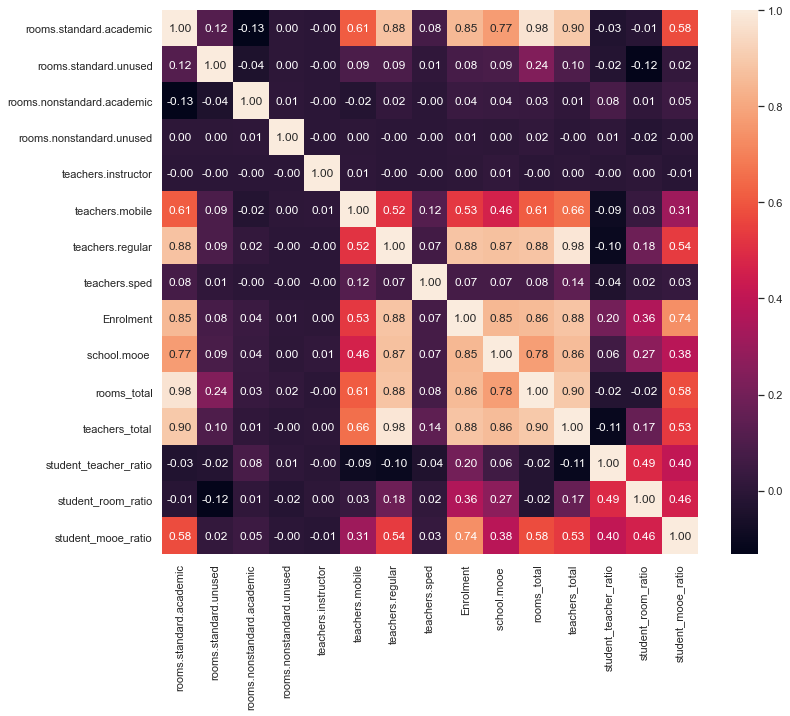

In [12]:
#df_corr.corr()
plt.figure(figsize=(12,10))
sns.set_theme()
ax = sns.heatmap(df_corr.corr(), annot=True, fmt='.2f',)
plt.show()

In [13]:
df_corr.columns

Index(['rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped', 'Enrolment', ' school.mooe ', 'rooms_total',
       'teachers_total', 'student_teacher_ratio', 'student_room_ratio',
       'student_mooe_ratio'],
      dtype='object')

In [14]:
df_ratio_ss = df_corr[['Enrolment', ' school.mooe ', 'rooms_total',
       'teachers_total' ]]

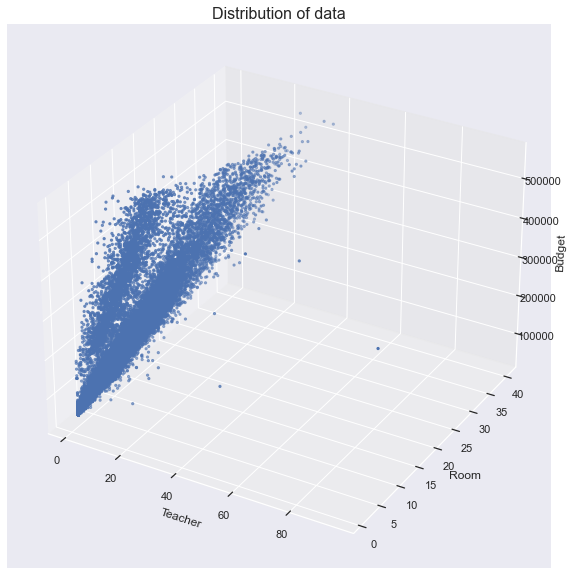

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

teacher = df_ratio_ss.teachers_total
room = df_ratio_ss['rooms_total']
budget = df_ratio_ss[' school.mooe ']

ax.scatter(teacher, room, budget, s=5)

ax.set_xlabel('Teacher')
ax.set_ylabel('Room')
ax.set_zlabel('Budget')
ax.set_title('Distribution of data', fontsize=16)

plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_ss = scaler.fit_transform(df_ratio_ss)
df_scaled_ss

array([[-0.86814339, -0.9190688 , -1.08722106, -1.00579802],
       [ 0.72113983,  0.77677382,  1.03747494,  1.60591935],
       [-0.533786  , -0.44902547, -0.23734266, -0.13522556],
       ...,
       [ 0.28256713,  1.32054945, -0.23734266, -0.30934005],
       [-0.54681291,  0.63852578, -0.66228186, -0.65756904],
       [-0.4252284 , -0.13566324, -1.08722106, -1.17991251]])

In [17]:
print(df_scaled_ss.min())
print(df_scaled_ss.max())

-1.2996906601520137
15.186849679881327


In [18]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(df_scaled_ss)

cluster_labels = model.predict(df_scaled_ss)   


[145080.00000000052, 58158.473178276334, 37211.18087370182, 27391.76695379177, 22623.342952851242, 18825.155406068297, 16687.503254540894, 15216.952190158598, 14005.250874821995]


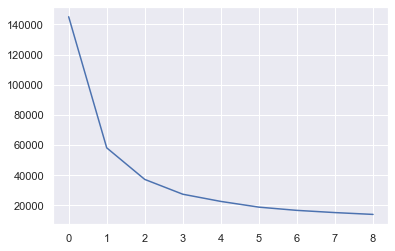

In [19]:
from sklearn.cluster import KMeans

ssd = []
range_n_clusters = list(np.arange(1,10))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scaled_ss)   
    ssd.append(kmeans.inertia_)
    
print(ssd)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled_ss)
cluster_labels = kmeans.predict(df_scaled_ss)   


df_ratio_ss['Cluster_Labels'] = cluster_labels
df_ratio_ss['Cluster_Labels'].value_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    23959
1     9723
2     2588
Name: Cluster_Labels, dtype: int64

In [21]:
from sklearn.metrics import silhouette_score
#from sklearn.metrics import silhouette_samples
range_n_clusters = list(np.arange(2,4))

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_scaled_ss)
    
    cluster_labels = kmeans.predict(df_scaled_ss)
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled_ss, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5987870524511449
For n_clusters=3, the silhouette score is 0.5244900735202465


In [22]:
df_ratio_ss.head()

,Enrolment,school.mooe,rooms_total,teachers_total,Cluster_Labels
100001,90.0,84000.0,2.0,2.0,0
100002,456.0,268000.0,12.0,17.0,1
100003,167.0,135000.0,6.0,7.0,0
100004,122.0,116000.0,6.0,7.0,0
100005,77.0,115000.0,6.0,7.0,0


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df_ratio_ss)

df_minmax = pd.DataFrame(df_minmax, index=df_ratio_ss.index, columns=df_ratio_ss.columns)

df_minmax['Cluster_Labels'] = cluster_labels

df_clusters = df_minmax.set_index("Cluster_Labels")
df_clusters = df_clusters.groupby("Cluster_Labels").mean().reset_index()
df_clusters

,Cluster_Labels,Enrolment,school.mooe,rooms_total,teachers_total
0,0,0.083532,0.147757,0.094107,0.038999
1,1,0.214999,0.443581,0.232507,0.112156
2,2,0.441458,0.732060,0.453434,0.227938


In [24]:
from math import pi
def make_spider(row, title, color):
 
    # number of variable
    categories=list(df_clusters)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 3.5)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
#     plt.yticks([-2, -1, 0, 1, 2], [-2,-1, 0, 1, 2], color="grey", size=7) #for sscaled
#     plt.ylim(-2.5,2.5)
    plt.yticks([-0.25, 0, 0.25, 0.5, 0.75, 1], [-0.25, 0, 0.25, 0.5,0.75, 1], color="grey", size=7) #formmscaled
    plt.ylim(-0.25,1)

    # Ind1
    values=df_clusters.loc[row].drop('Cluster_Labels').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)

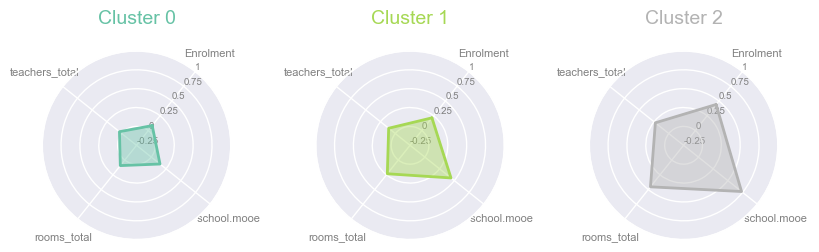

In [25]:
my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace=0.5)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_clusters.index))

for row in range(0, len(df_clusters.index)):
    make_spider(row=row, 
                title='Cluster '+(df_clusters['Cluster_Labels'][row]).astype(str), 
                color=my_palette(row))

In [26]:
df_outlier_removed.columns

Index(['school.region', 'school.cityincome', 'rooms.standard.academic',
       'rooms.standard.unused', 'rooms.nonstandard.academic',
       'rooms.nonstandard.unused', 'teachers.instructor', 'teachers.mobile',
       'teachers.regular', 'teachers.sped', 'Enrolment', ' school.mooe ',
       'school.classification', 'rooms_total', 'teachers_total',
       'student_teacher_ratio', 'student_room_ratio', 'student_mooe_ratio'],
      dtype='object')

In [27]:
df_outlier_removed['Cluster_Labels'] = df_ratio_ss['Cluster_Labels']

In [28]:
df_outlier_removed.groupby(['Cluster_Labels', 'school.cityincome']).size()
income = ['Below P 15 M', 'P 15 M or more but less than P 25 M', 'P 25 M or more but less than P 35 M', 
         'P 35 M or more but less than P 45 M', 'P 45 M or more but less than P 55 M', 
        'P 55 M or more', 'P 80 M or more but less than P 160 M', 
         'P 160 M or more but less than P 240 M', 'P 240 M or more but less than P 320 M', 
         'P 320 M or more but less than P 400 M', 'P 400 M or more', 'Special Class']
df_outlier_removed['school.cityincome'] = pd.Categorical(df_outlier_removed['school.cityincome'], 
                                                         categories=income, ordered=True)


In [29]:
zero = df_outlier_removed[df_outlier_removed['Cluster_Labels']==0]['school.cityincome'].value_counts(sort=False).reset_index()
one = df_outlier_removed[df_outlier_removed['Cluster_Labels']==1]['school.cityincome'].value_counts(sort=False).reset_index()
two = df_outlier_removed[df_outlier_removed['Cluster_Labels']==2]['school.cityincome'].value_counts(sort=False).reset_index()

In [30]:
zero['proportion'] = zero['school.cityincome']/zero['school.cityincome'].sum()
one['proportion'] = one['school.cityincome']/one['school.cityincome'].sum()
two['proportion'] = two['school.cityincome']/two['school.cityincome'].sum()

In [31]:
zero

,index,school.cityincome,proportion
0,Below P 15 M,118,0.004925
1,P 15 M or more but less than P 25 M,2563,0.106974
2,P 25 M or more but less than P 35 M,5072,0.211695
3,P 35 M or more but less than P 45 M,4176,0.174298
4,P 45 M or more but less than P 55 M,3264,0.136233
5,P 55 M or more,6298,0.262866
6,P 80 M or more but less than P 160 M,51,0.002129
7,P 160 M or more but less than P 240 M,559,0.023332
8,P 240 M or more but less than P 320 M,681,0.028424
9,P 320 M or more but less than P 400 M,299,0.012480


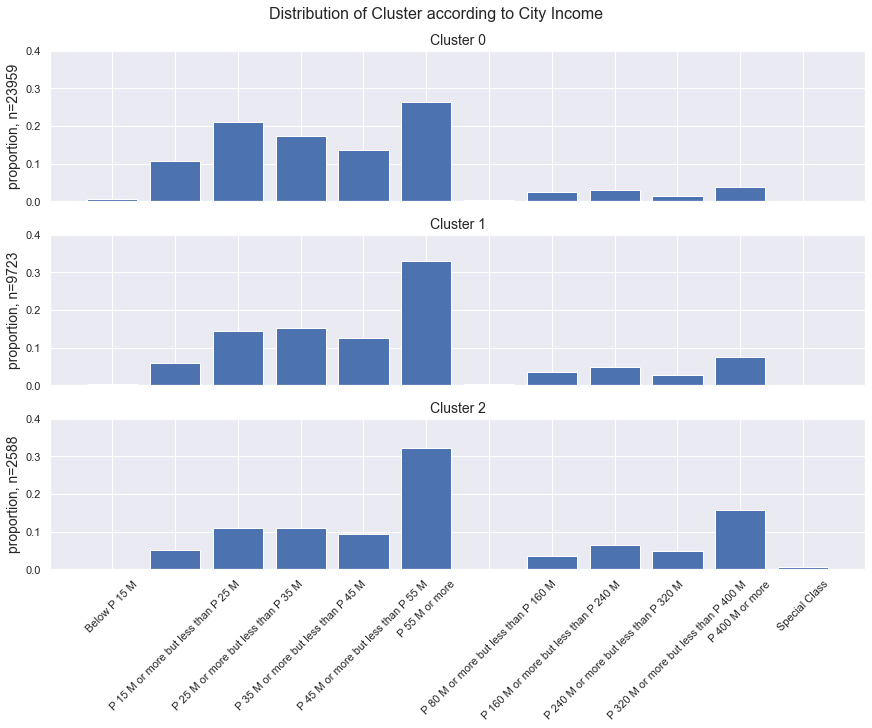

<Figure size 432x288 with 0 Axes>

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12,10),  constrained_layout=True, sharex=True)


ax1.bar(zero['index'], zero['proportion'])
ax1.set_title('Cluster 0', fontsize=14)
ax1.set_ylabel('proportion, n=23959', fontsize=14)
ax2.bar(one['index'], one['proportion'])
ax2.set_title('Cluster 1', fontsize=14)
ax2.set_ylabel('proportion, n=9723', fontsize=14)
ax3.bar(two['index'], two['proportion'])
ax3.set_title('Cluster 2', fontsize=14)
ax3.set_ylabel('proportion, n=2588', fontsize=14)
 

ax1. set_ylim(0, 0.4)
ax2. set_ylim(0, 0.4)
ax3. set_ylim(0, 0.4)
plt.xticks(rotation=45)
fig.suptitle('Distribution of Cluster according to City Income', fontsize=16)
plt.show()
plt.savefig('income.png')

In [33]:
from sklearn.decomposition import PCA



pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled_ss)

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])


finalDf = pd.concat([principalDf, pd.DataFrame(df_ratio_ss['Cluster_Labels'].reset_index(), columns=['Cluster_Labels'])], axis = 1)

finalDf

,principal component 1,principal component 2,Cluster_Labels
0,-1.939967,0.105402,0
1,2.078711,-0.254995,1
2,-0.675124,-0.180564,0
3,-0.859111,-0.316321,0
4,-0.962025,-0.326195,0
...,...,...,...
36265,1.747327,1.529381,1
36266,-1.145945,0.625772,0
36267,0.511726,1.194895,1
36268,-0.628110,0.978590,0


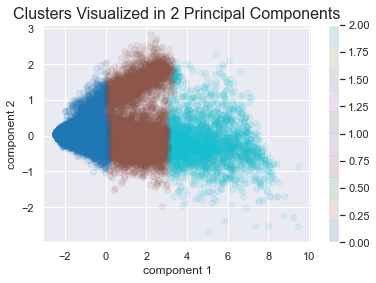

In [34]:
import matplotlib.pyplot as plt
plt.plot(size=(6,6))
plt.scatter(finalDf.iloc[:, 0], finalDf.iloc[:, 1],
            c=df_ratio_ss['Cluster_Labels'], cmap='tab10', alpha=0.1)

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Clusters Visualized in 2 Principal Components', fontsize = 16)
plt.colorbar()

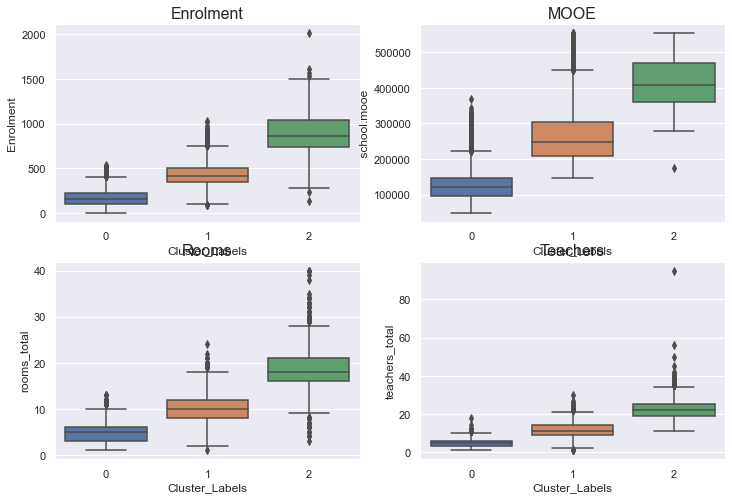

<Figure size 432x288 with 0 Axes>

In [35]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

sns.boxplot(x="Cluster_Labels", y="Enrolment", data=df_ratio_ss, ax=axes[0,0])
axes[0,0].set_title("Enrolment", fontsize=16)
#axes[0,0].set_ylabel("Number of Enrollees", fontsize=12)


sns.boxplot(x=df_ratio_ss.Cluster_Labels, y=df_ratio_ss[" school.mooe "], ax=axes[0,1])
axes[0,1].set_title("MOOE", fontsize=16)
#axes[0,1].set_ylabel("MOOE", fontsize=12)

sns.boxplot(x=df_ratio_ss.Cluster_Labels, y=df_ratio_ss.rooms_total, ax=axes[1,0])
axes[1,0].set_title("Rooms", fontsize=16)
#axes[1,0].set_ylabel("Total number of Rooms", fontsize=12)

sns.boxplot(x=df_ratio_ss.Cluster_Labels, y=df_ratio_ss.teachers_total, ax=axes[1,1])
axes[1,1].set_title("Teachers", fontsize=16)
#axes[1,1].set_ylabel("Total number of Teachers", fontsize=16)

#fig.suptitle('Distribution of Resources according to Cluster', fontsize=16)

plt.show()
plt.tight_layout()
plt.show();

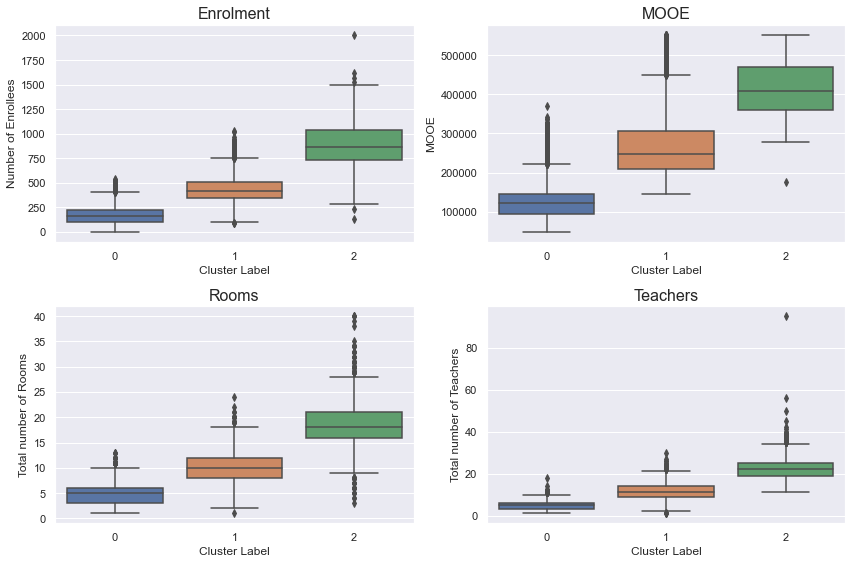

In [36]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

sns.boxplot(x="Cluster_Labels", y="Enrolment", data=df_ratio_ss, ax=axes[0,0])
axes[0,0].set_title("Enrolment", fontsize=16)
axes[0,0].set_ylabel("Number of Enrollees", fontsize=12)
axes[0,0].set_xlabel("Cluster Label", fontsize=12)

sns.boxplot(x=df_ratio_ss.Cluster_Labels, y=df_ratio_ss[" school.mooe "], ax=axes[0,1])
axes[0,1].set_title("MOOE", fontsize=16)
axes[0,1].set_ylabel("MOOE", fontsize=12)
axes[0,1].set_xlabel("Cluster Label", fontsize=12)

sns.boxplot(x=df_ratio_ss.Cluster_Labels, y=df_ratio_ss.rooms_total, ax=axes[1,0])
axes[1,0].set_title("Rooms", fontsize=16)
axes[1,0].set_ylabel("Total number of Rooms", fontsize=12)
axes[1,0].set_xlabel("Cluster Label", fontsize=12)

sns.boxplot(x=df_ratio_ss.Cluster_Labels, y=df_ratio_ss.teachers_total, ax=axes[1,1])
axes[1,1].set_title("Teachers", fontsize=16)
axes[1,1].set_ylabel("Total number of Teachers", fontsize=12)
axes[1,1].set_xlabel("Cluster Label", fontsize=12)

plt.tight_layout()
plt.show();